In [8]:
# visualization of pre-trained model
# pyright: reportMissingImports=false

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.image import rgb_to_grayscale
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

from root_dir import ROOT_DIR
from absl import app, flags

import lib.globals
from lib.image_dataset import fast_get_class_names, _preprocess
from  lib.model import make_model, load_model
# _ = app.parse_flags_with_usage(['test' ,'--flagfile', '../model.cfg'])
_ = app.parse_flags_with_usage(['test' ,'--edges'])

class_names = fast_get_class_names()
model = make_model(len(class_names))
model = load_model(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [2]:
for i, layer in enumerate(model.layers[0].layers):
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

2 block1_conv1 (None, 224, 224, 64)
3 block1_conv2 (None, 224, 224, 64)
5 block2_conv1 (None, 112, 112, 128)
6 block2_conv2 (None, 112, 112, 128)
8 block3_conv1 (None, 56, 56, 256)
9 block3_conv2 (None, 56, 56, 256)
10 block3_conv3 (None, 56, 56, 256)
12 block4_conv1 (None, 28, 28, 512)
13 block4_conv2 (None, 28, 28, 512)
14 block4_conv3 (None, 28, 28, 512)
16 block5_conv1 (None, 14, 14, 512)
17 block5_conv2 (None, 14, 14, 512)
18 block5_conv3 (None, 14, 14, 512)


In [9]:
blocks = [3, 6, 10, 14, 18]
outputs = [model.layers[0].layers[i].output for i in blocks]

vis_model = Model(inputs=model.inputs, outputs=outputs)
vis_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 224, 224, 3)  0           ['input_2[0][0]',                
                                                                  'input_2[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['concatenate_1[0][0]']    

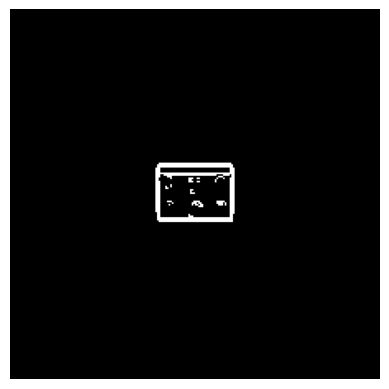

In [15]:
image = load_img('../images/3002.png')
image = img_to_array(image)
image = expand_dims(image, axis=0)
image, _ =  _preprocess(image)
pyplot.imshow(image[0].numpy(), cmap='gray')
pyplot.axis('off')
pyplot.show()

In [16]:
feature_map = vis_model.predict(image, steps=1)
[fmap.shape for fmap in feature_map]

1/1 [==============================] - 0s 178ms/step


[(1, 224, 224, 64),
 (1, 112, 112, 128),
 (1, 56, 56, 256),
 (1, 28, 28, 512),
 (1, 14, 14, 512)]

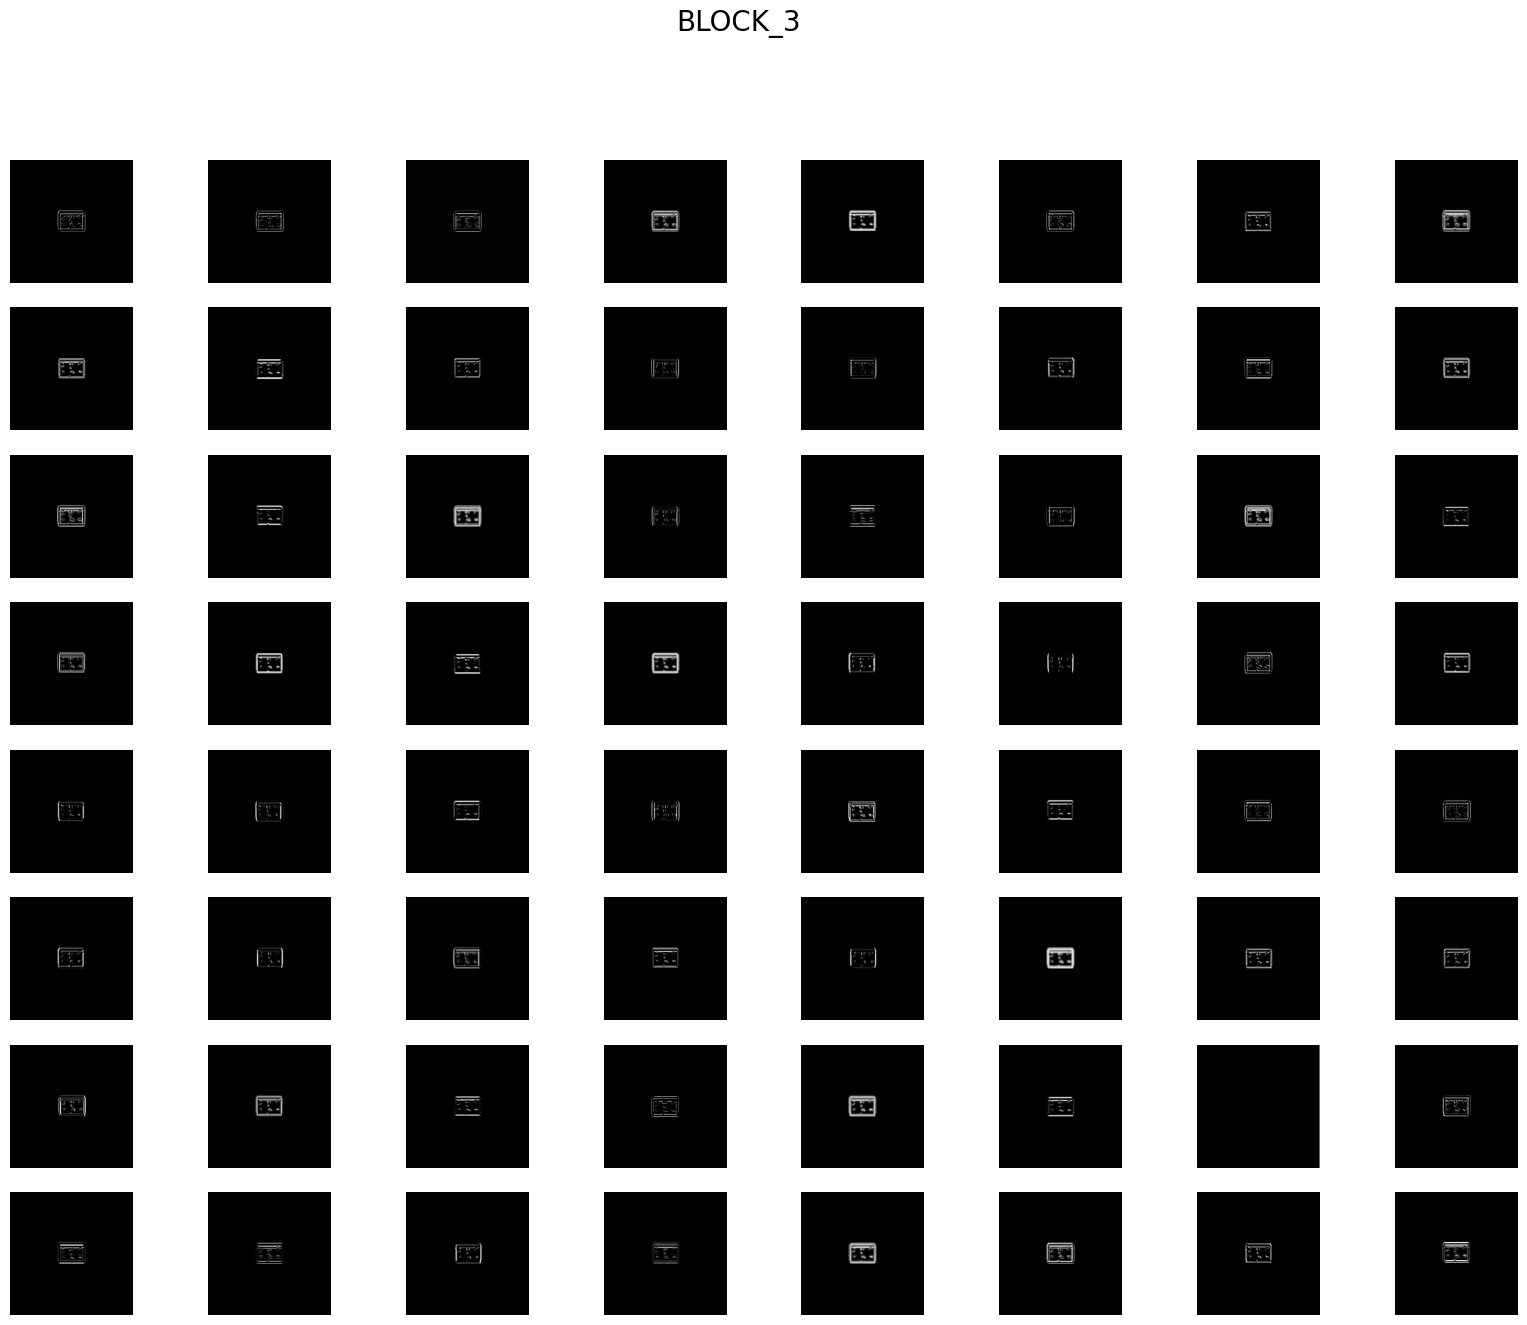

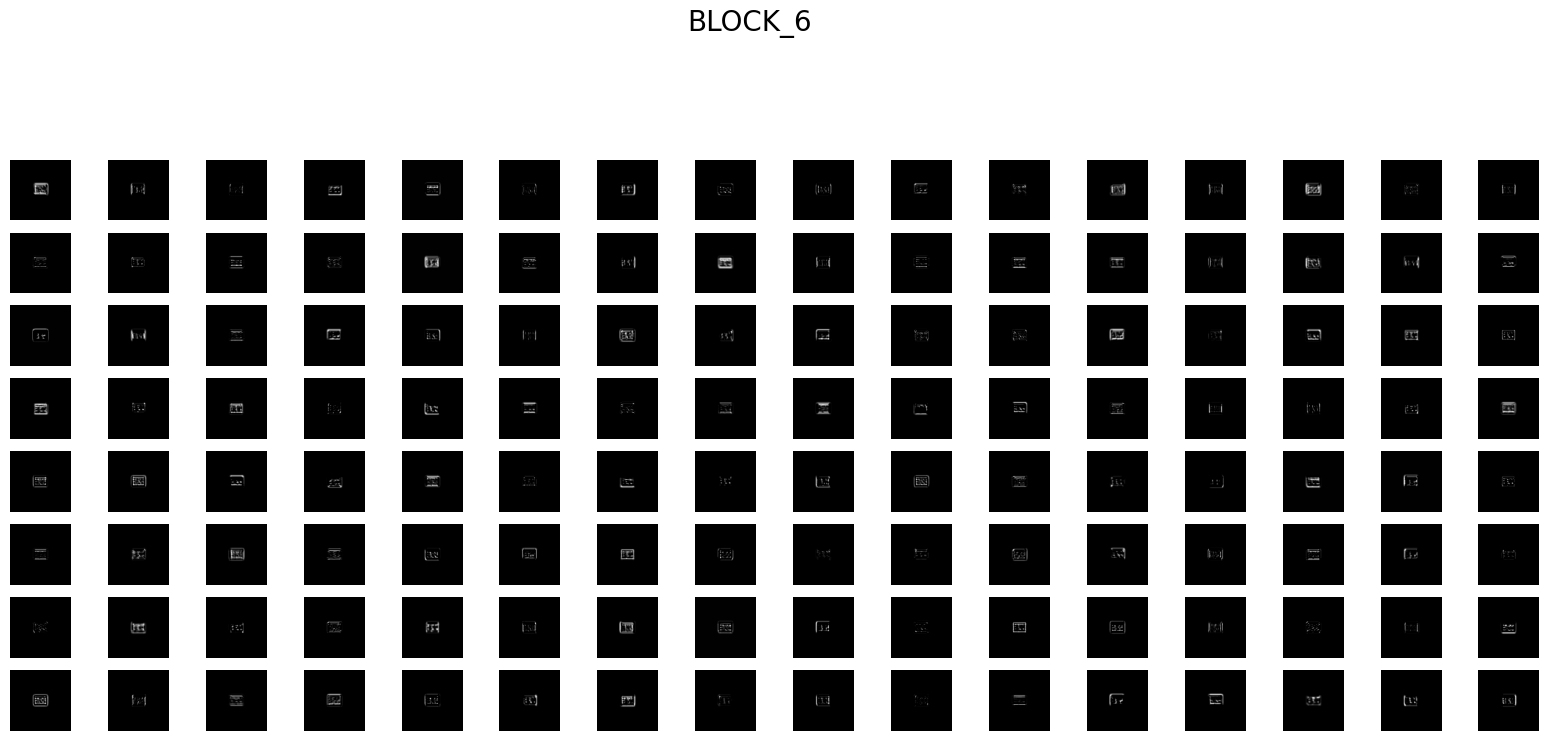

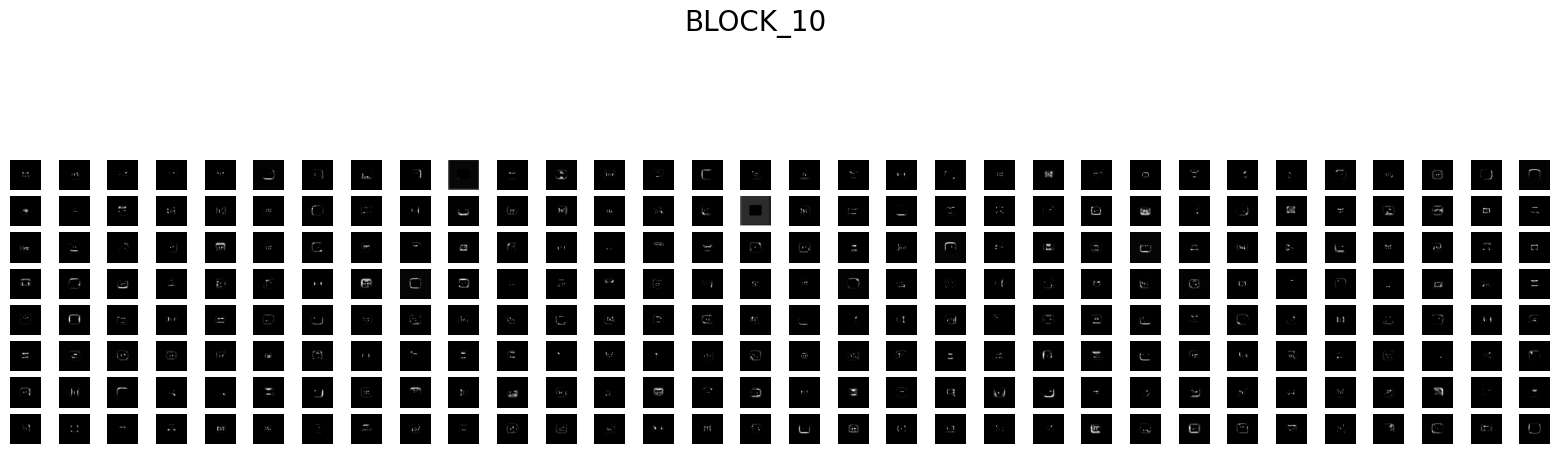

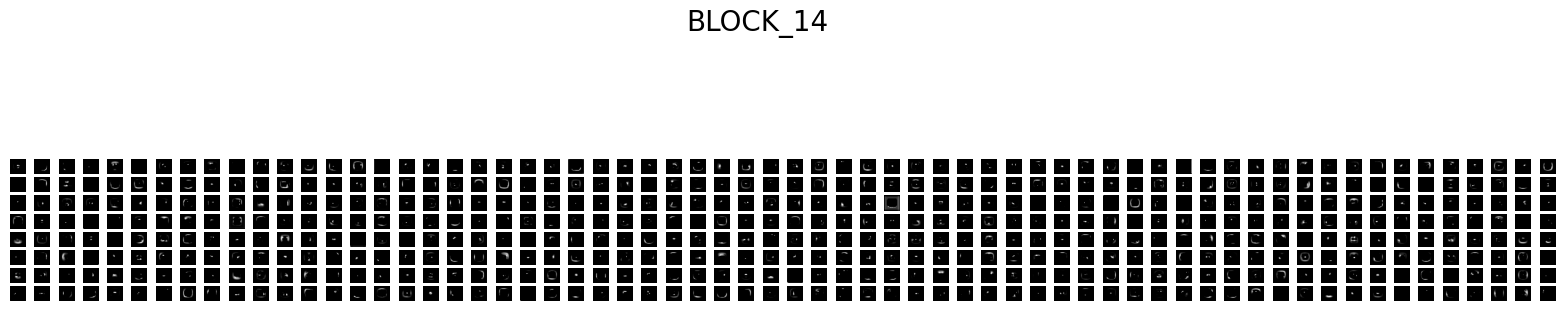

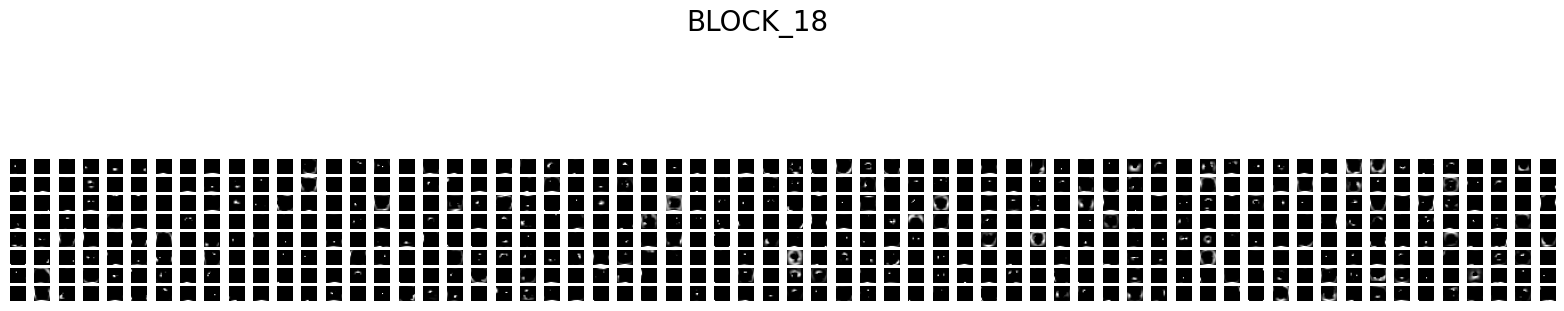

In [17]:
for i, features in zip(blocks, feature_map):
    fig = pyplot.figure(figsize=(20,15))
    fig.suptitle(f"BLOCK_{i}", fontsize=20)
    nc, nr = features.shape[3] // 8, features.shape[3] // 8
    for i in range(1, features.shape[3]+1):
        pyplot.subplot(nr, nc, i)
        pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
        pyplot.axis('off')
    
pyplot.show()